<a href="https://colab.research.google.com/github/Knightler/deep-learning-practice/blob/main/PYTORCH_Custom_Dataset(REVIEW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
import requests
import zipfile
from pathlib import Path
from tqdm.auto import tqdm

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
    print(f'{image_path} already exists')
else:
    print(f'Creating the folder...')
image_path.mkdir(parents=True, exist_ok=True)
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading...')
    f.write(request.content)

with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
    print(f'Unzipping...')
    zip_ref.extractall(image_path)
    print(f'Done :)')

Creating the folder...
Downloading...
Unzipping...
Done :)


In [4]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/train.
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi.
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak.
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza.
There are 3 directories and 0 images in data/pizza_steak_sushi/test.
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi.
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak.
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza.


In [6]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/train/pizza/2800325.jpg
pizza
Random image path: data/pizza_steak_sushi/train/pizza/2800325.jpg
Random image class: pizza
Random image height: 512
Random image width: 512


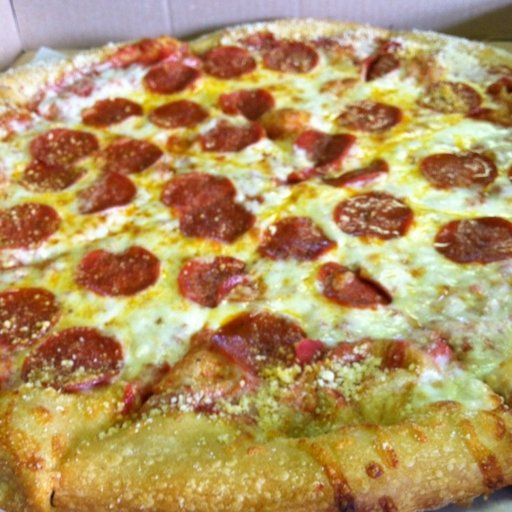

In [7]:
import random
from PIL import Image

torch.manual_seed(42)

image_path_list = list(image_path.glob('*/*/*.jpg'))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

print(f'Random image path: {random_image_path}')
print(f'Random image class: {image_class}')
print(f'Random image height: {img.height}')
print(f'Random image width: {img.width}')
img

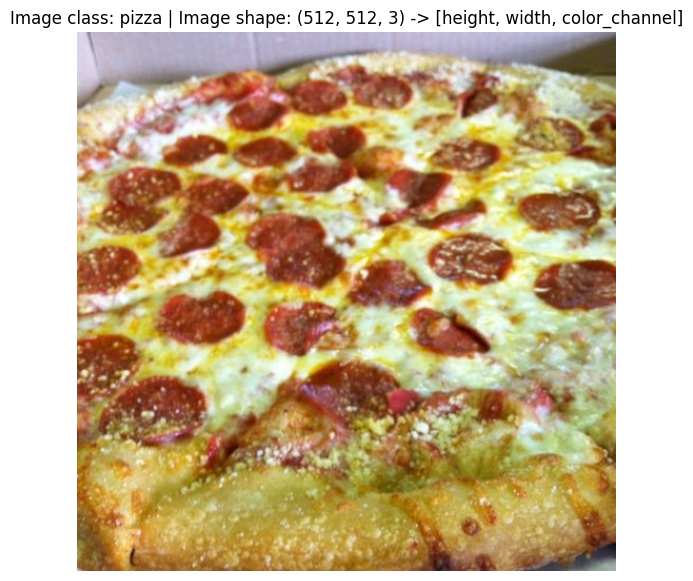

In [11]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channel]')
plt.axis('off');

array([[[217, 211, 225],
        [219, 213, 227],
        [221, 214, 232],
        ...,
        [132, 128, 142],
        [128, 124, 138],
        [127, 123, 137]],

       [[218, 212, 226],
        [219, 213, 227],
        [222, 215, 233],
        ...,
        [126, 123, 134],
        [123, 120, 131],
        [121, 118, 129]],

       [[219, 213, 227],
        [220, 214, 228],
        [222, 215, 233],
        ...,
        [118, 113, 120],
        [114, 109, 116],
        [112, 107, 114]],

       ...,

       [[170, 153, 143],
        [154, 136, 122],
        [136, 117, 100],
        ...,
        [158, 177, 175],
        [159, 179, 177],
        [158, 178, 176]],

       [[186, 176, 174],
        [178, 167, 163],
        [165, 151, 142],
        ...,
        [157, 177, 175],
        [157, 177, 175],
        [155, 175, 173]],

       [[178, 172, 174],
        [182, 174, 172],
        [181, 170, 166],
        ...,
        [158, 178, 176],
        [157, 177, 175],
        [155, 175, 173]]], dtype=uint8)
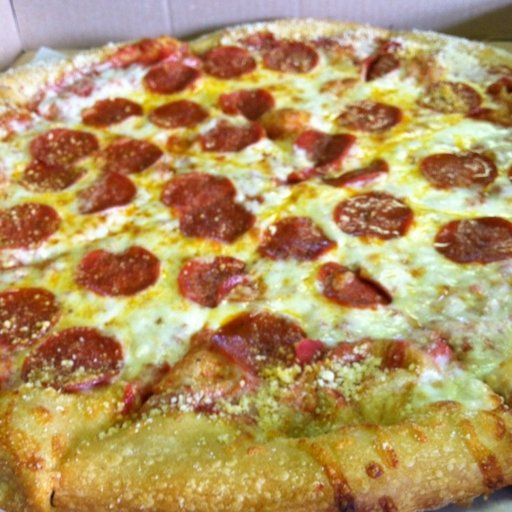

In [15]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [19]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [7]:
def plot_transformed_images()